**1. Load & Inspect the Dataset**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**2. Summary Statistics & Missing Values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


 **3. Univariate Analysis**
**Histograms & Boxplots:**

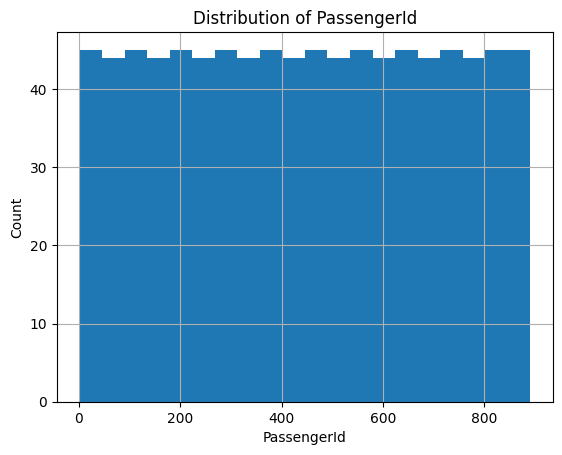

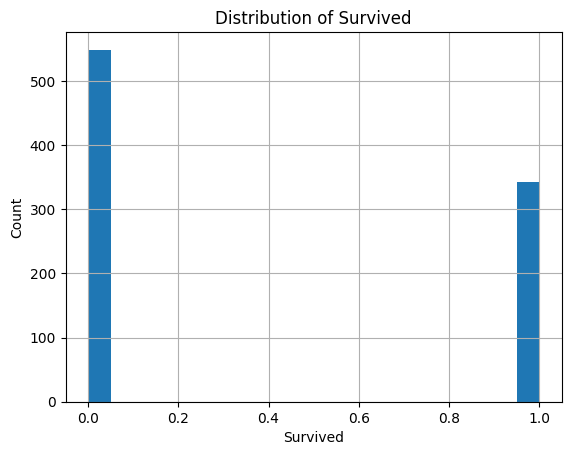

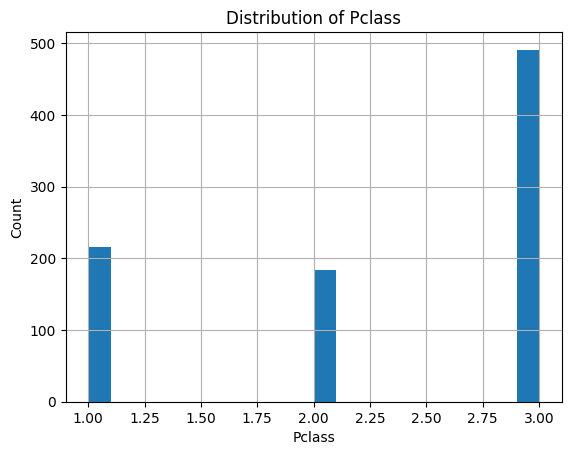

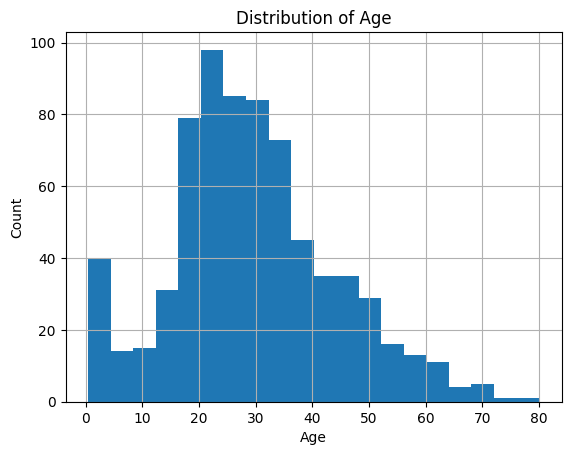

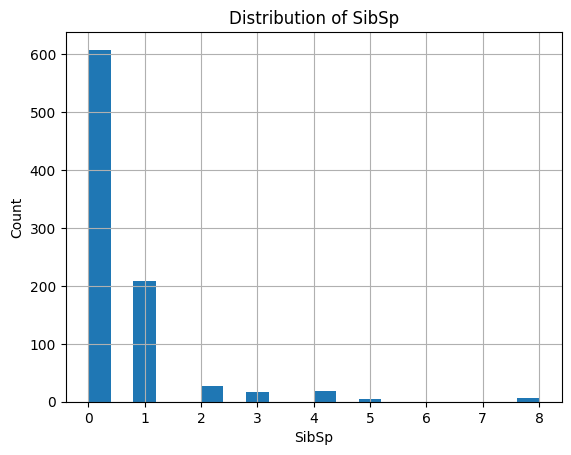

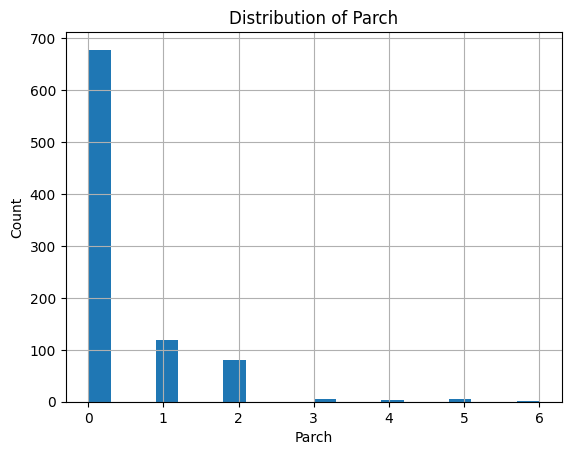

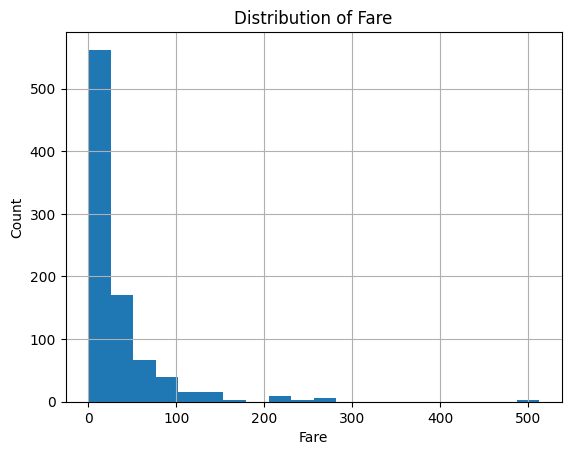

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure() # Create a new figure for each histogram
    df[col].hist(bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

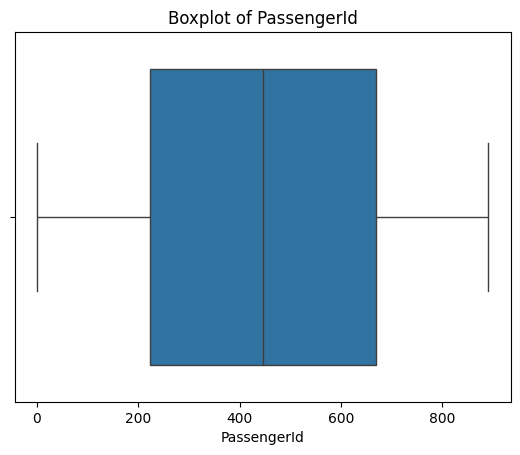

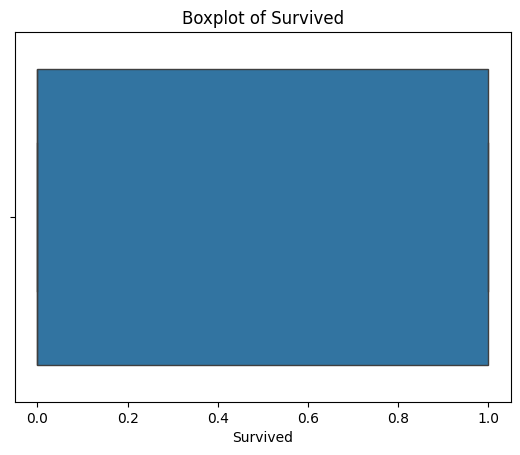

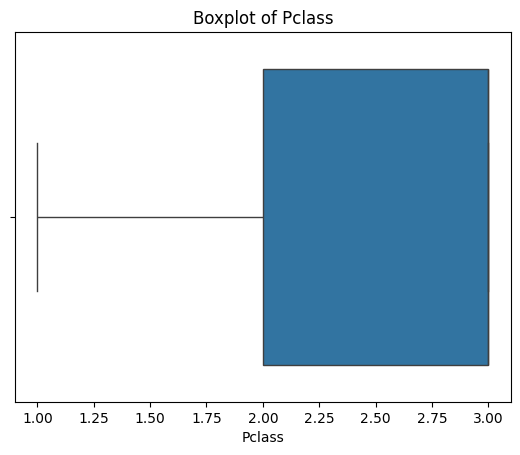

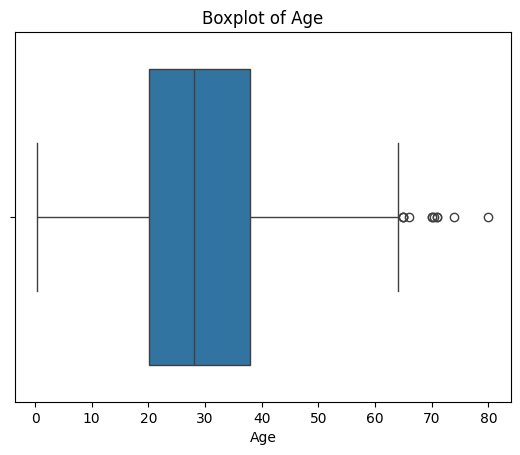

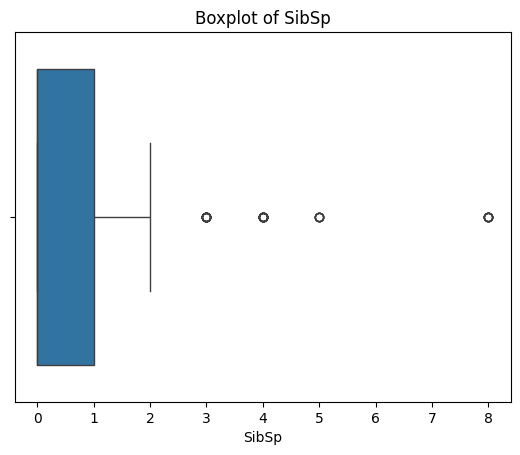

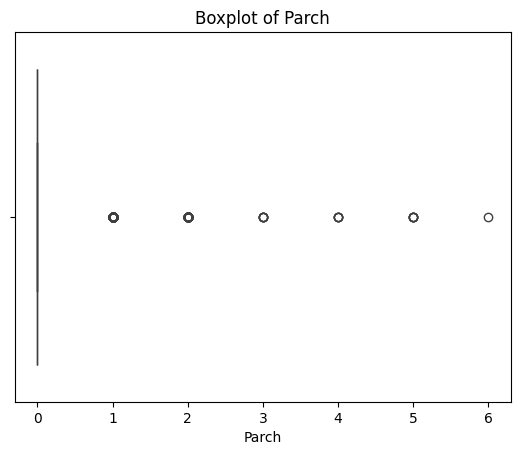

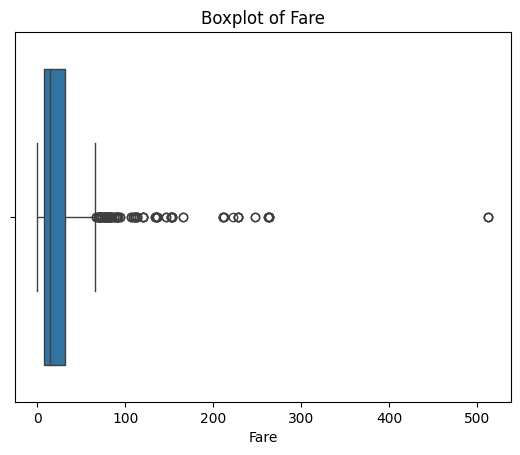

In [9]:
for col in numeric_cols:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

**4. Bivariate Analysis**

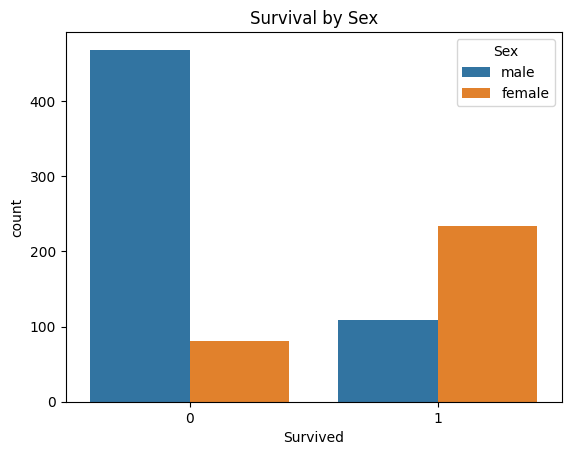

In [10]:
#Categorical vs Target (Survived):

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.show()
#Females had a much higher survival rate than males.
#Most survivors were female, and most non-survivors were male.

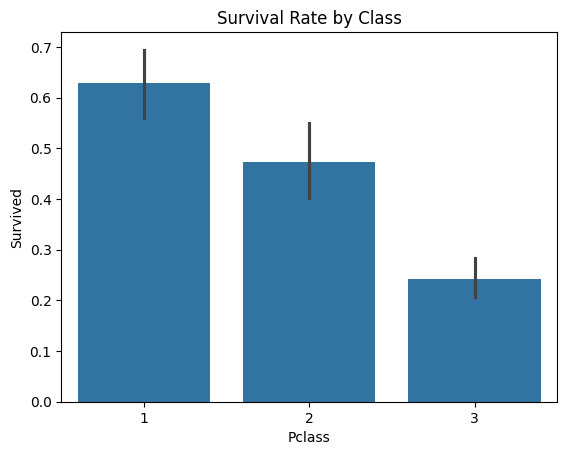

In [11]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()
#1st class passengers had the highest survival rate.
#3rd class passengers had the lowest survival rate.

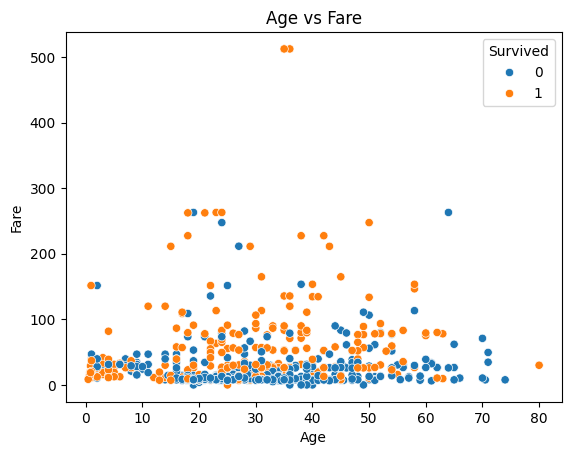

In [13]:
# Numeric vs Numeric:

sns.scatterplot(x='Age', y='Fare',hue='Survived', data=df)
plt.title("Age vs Fare")
plt.show()

**5. Correlation Matrix & Pairplot**

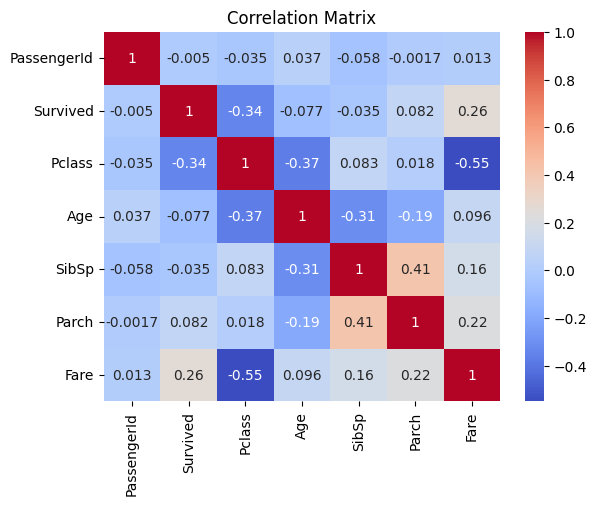

In [16]:
# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#Fare and Survived:
#Positive correlation (~0.26)
#Passengers who paid higher fares were more likely to survive (likely 1st class).

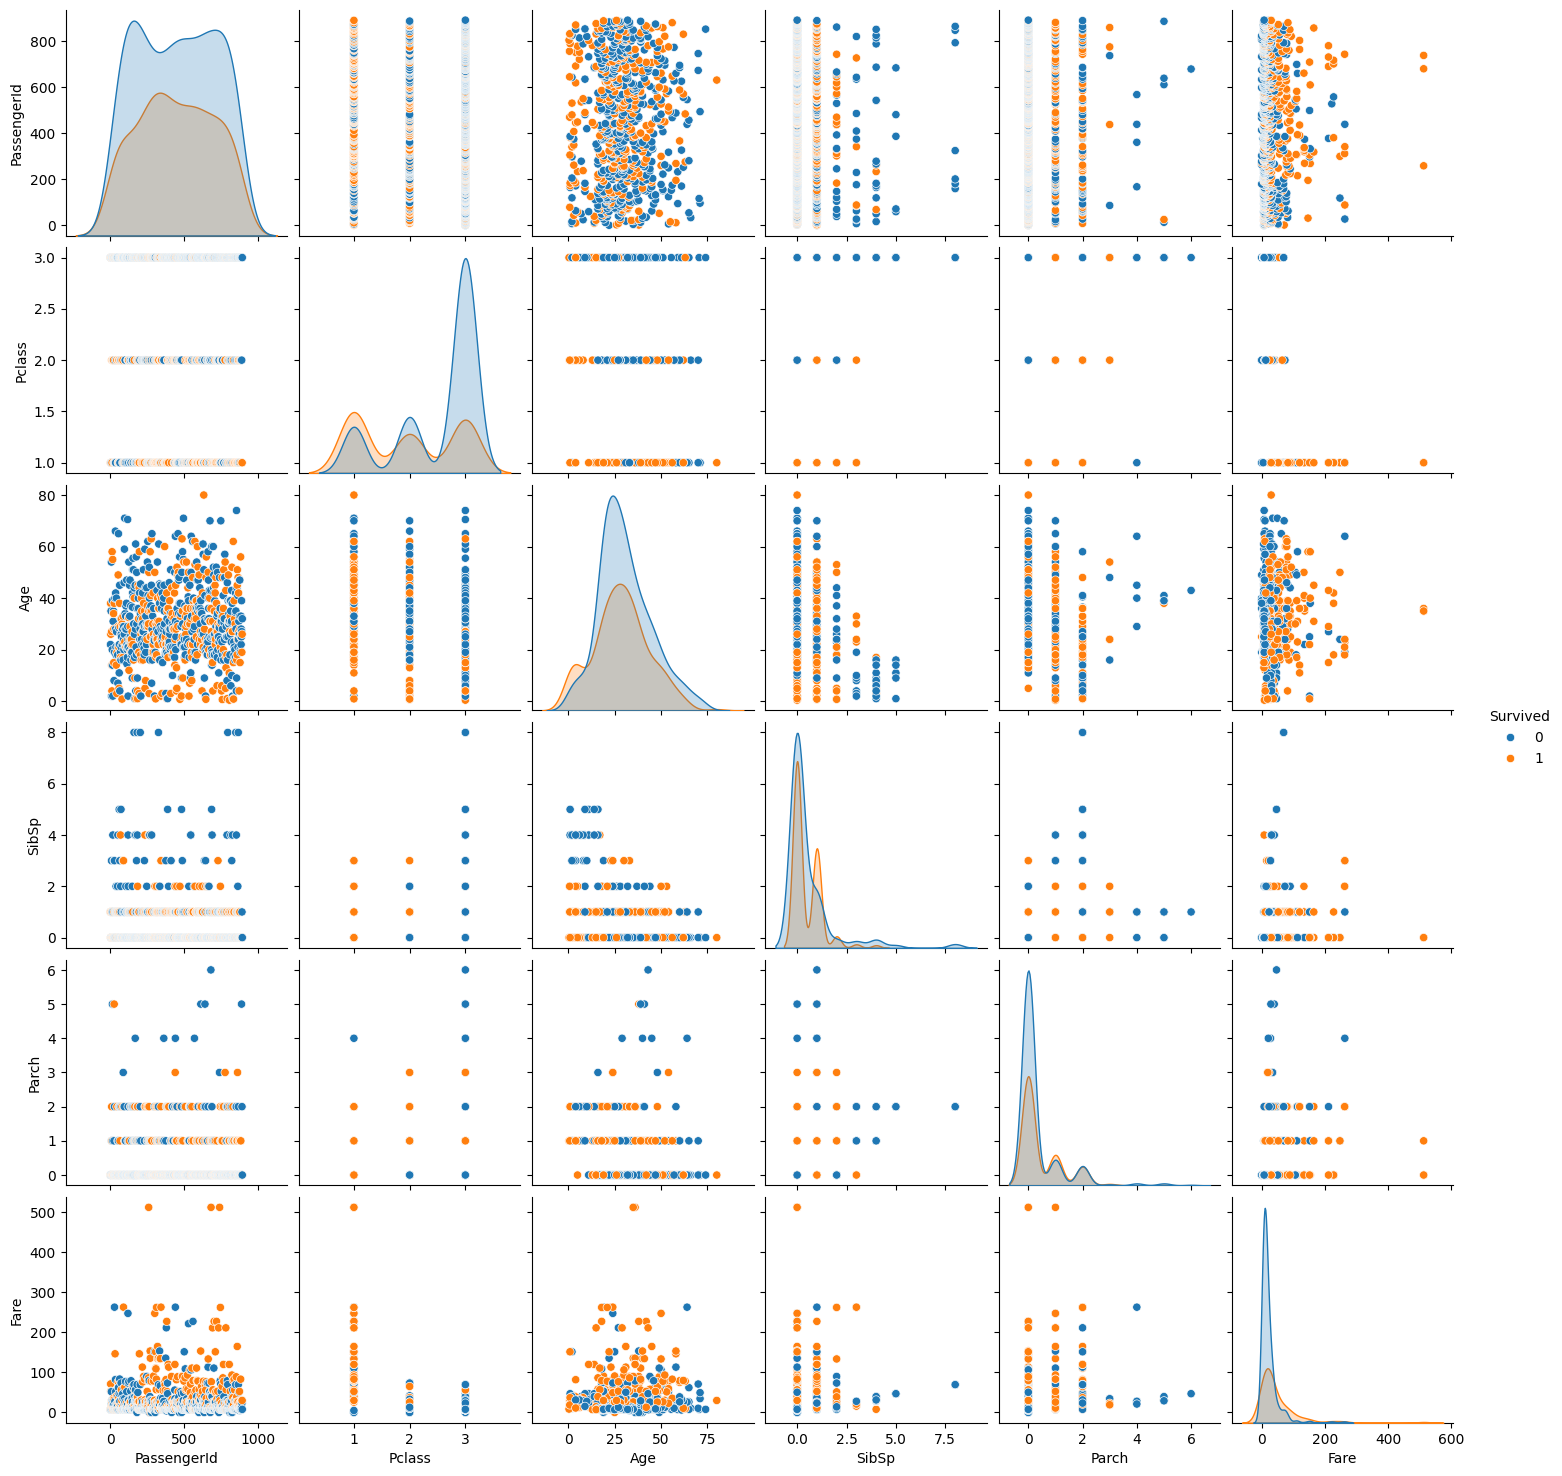

In [17]:
# Pairplot

sns.pairplot(df, hue='Survived')
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

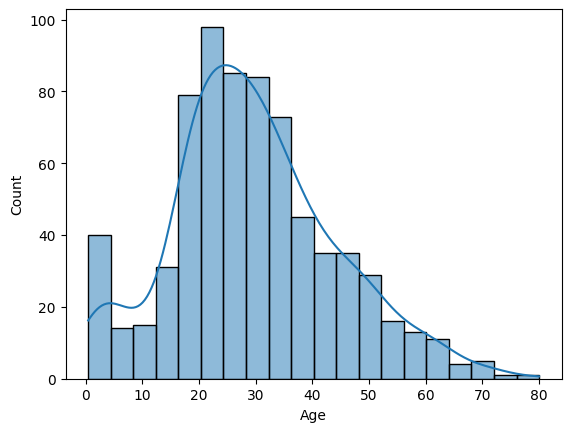

In [20]:
# Age Distribution
sns.histplot(df['Age'], kde=True)
#Inference: Age is right-skewed (more younger people).
#Many children and young adults onboard.

<Axes: xlabel='Fare'>

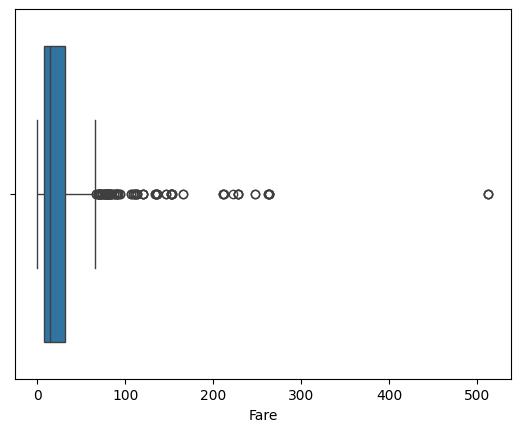

In [21]:
# Fare Distribution
sns.boxplot(x='Fare', data=df)
#Inference: Highly right-skewed, with extreme high-value outliers.
#Most passengers paid low fares; a few paid very high fares (possibly 1st class).

<Axes: xlabel='Survived', ylabel='Age'>

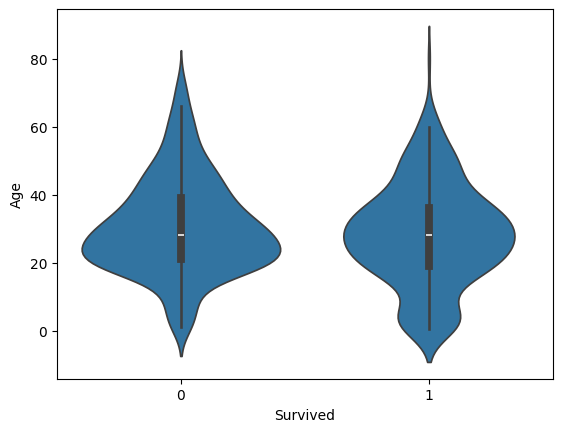

In [25]:
# Age vs Survival
sns.violinplot(x='Survived', y='Age', data=df)
#Inference: Children had higher survival rates.
#Elderly passengers had low survival probabilities.
